In [49]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [50]:
# Data Aumentaion performs bad in small NN even worse than without data augmentaion!!!

In [51]:
#Data Loading
from keras.datasets import cifar10 
(train_images, train_labels), (test_images, test_labels)  = cifar10.load_data()
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

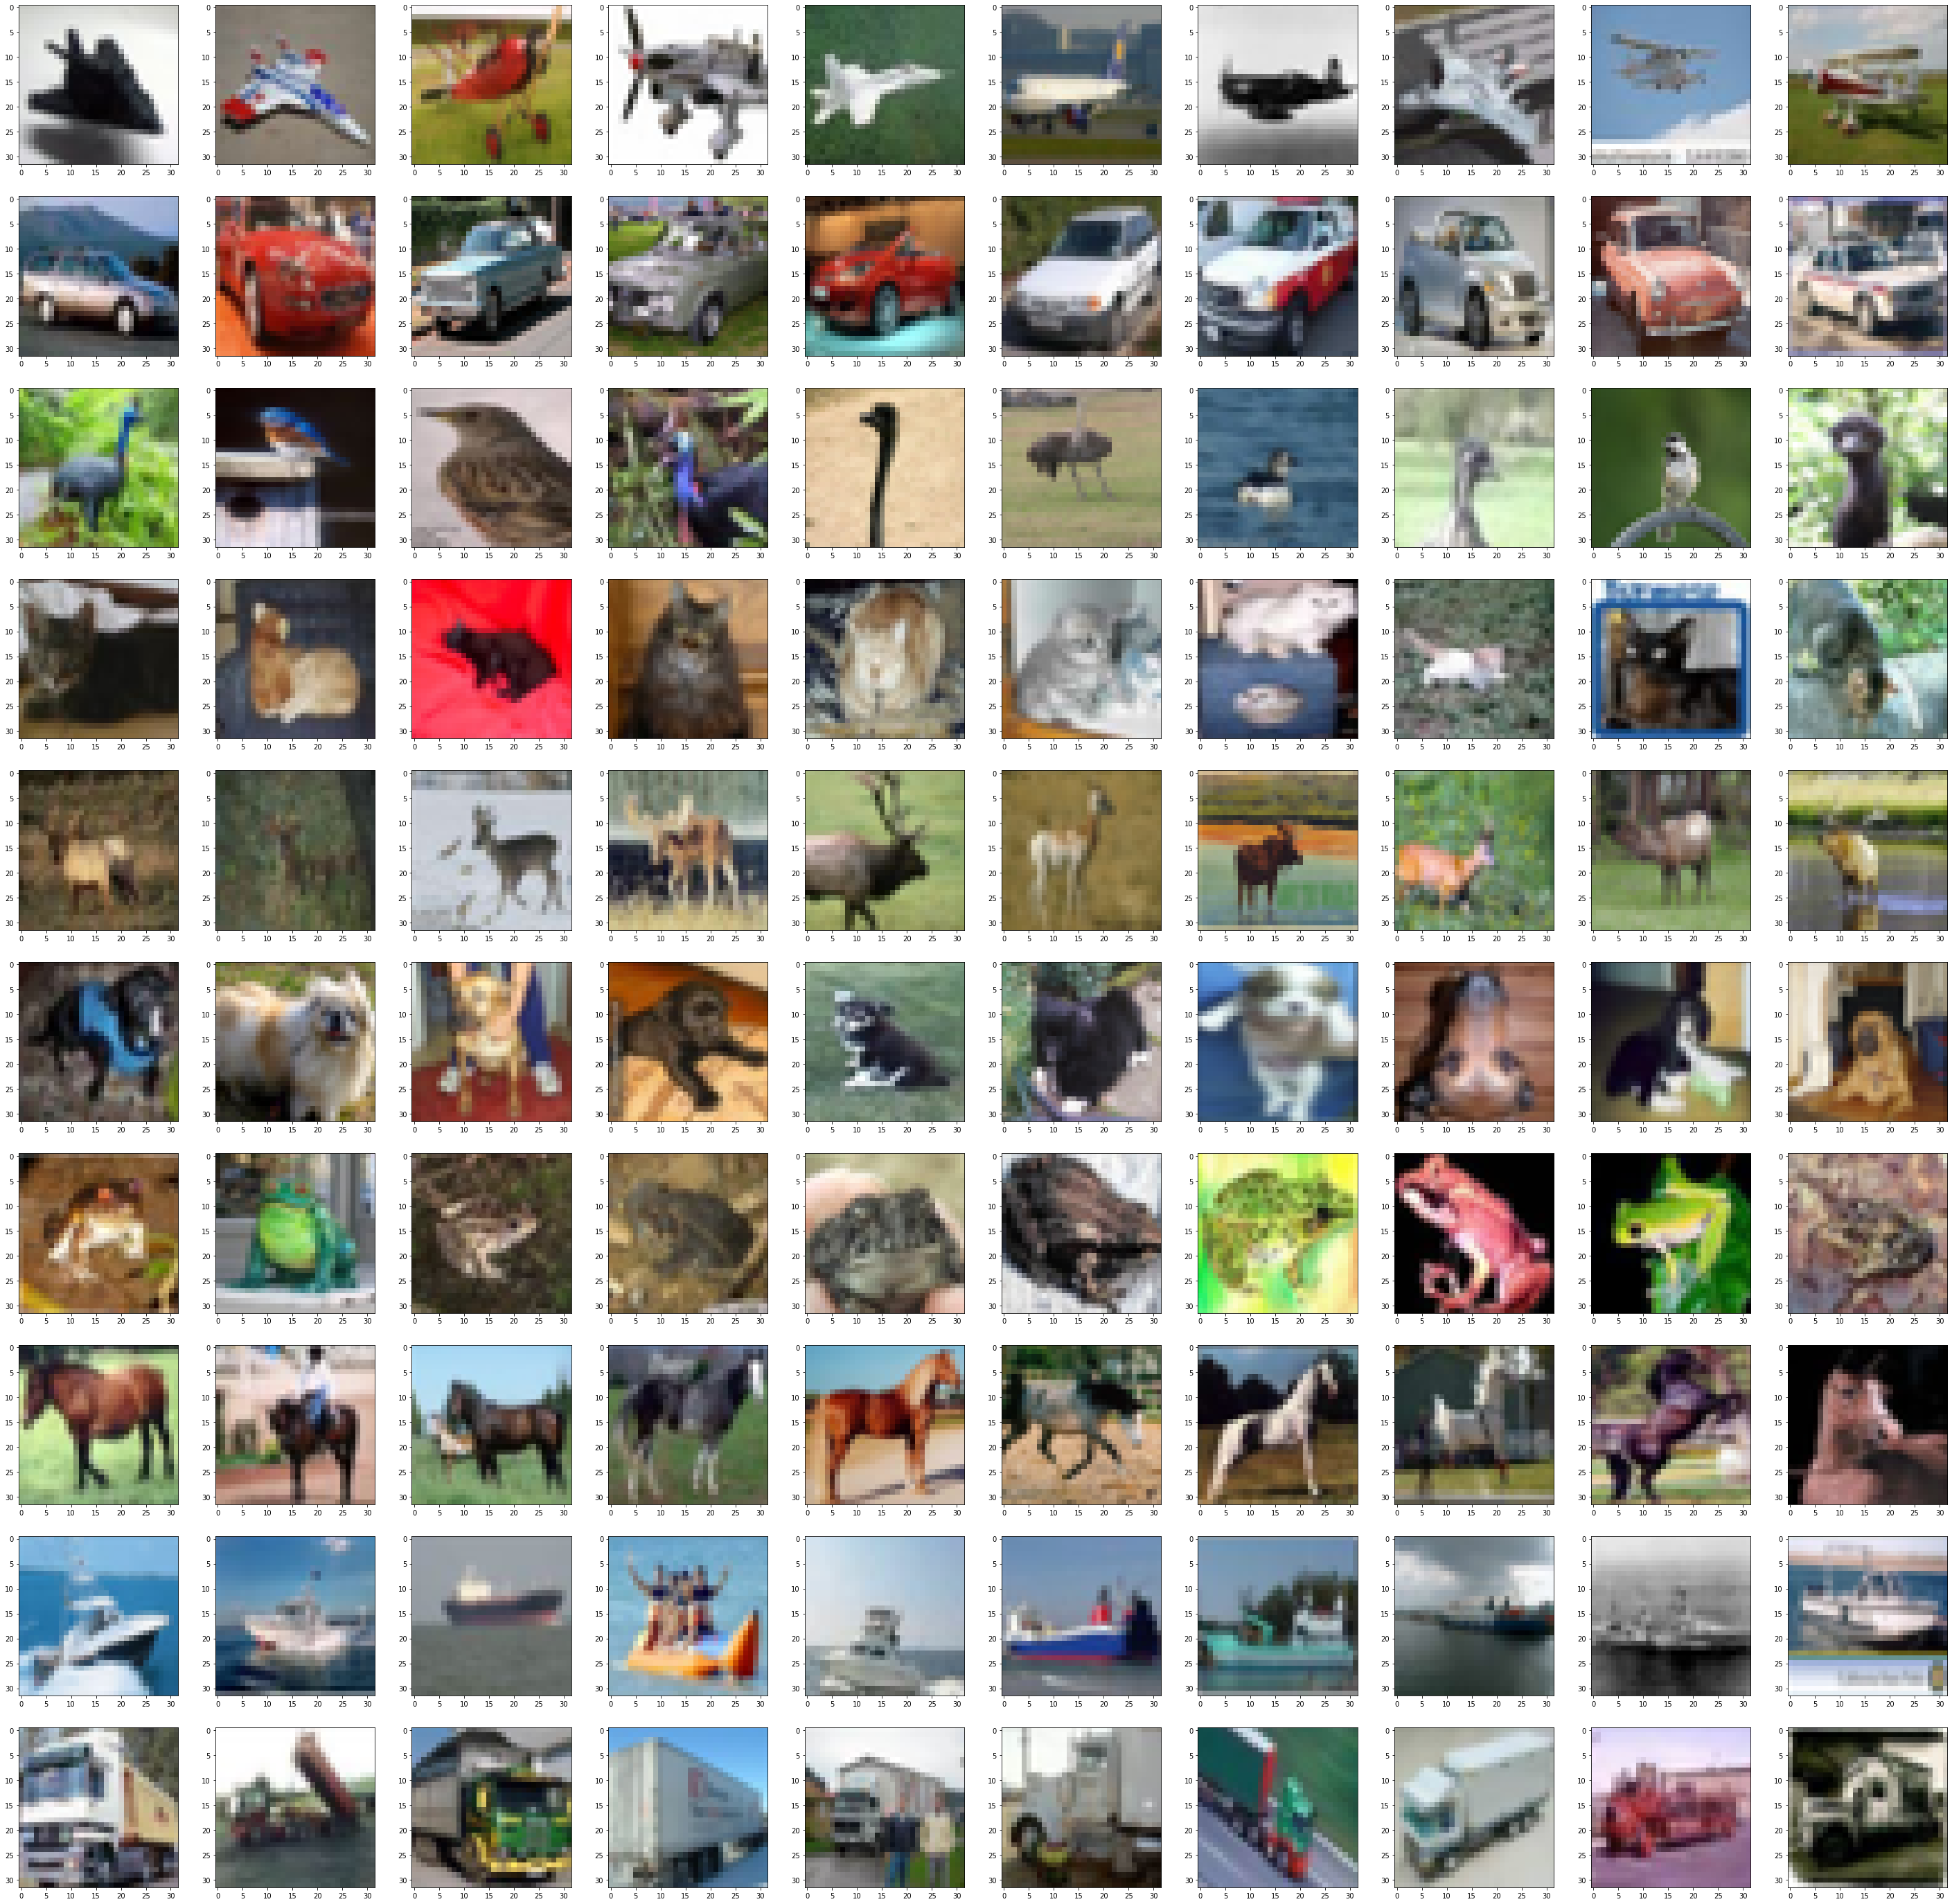

In [52]:
#Visualize 10 examples from each class, in a grid of 10x10 plots
import numpy as np
import matplotlib.pyplot as plt

classes=[]
for i in range(10):
    
    classes.append(np.where(train_labels == i)[0][:10])

fig = plt.figure(figsize=(50, 50))
index = 1
for i in classes:
    
    for j in i:
        fig.add_subplot(10, 10, index)
        img = train_images[j]
        plt.imshow(np.reshape(img, (32, 32, 3)))
        index+=1

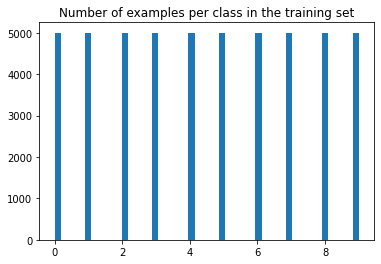

In [53]:
#Plot a histogram of number of examples per class in the training 
plt.hist(train_labels,bins=50)
plt.title('Number of examples per class in the training set');

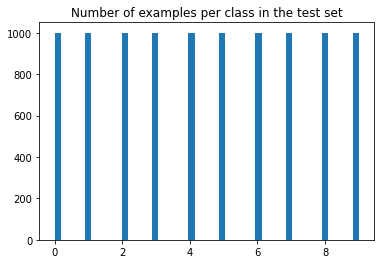

In [54]:
#Plot a histogram of number of examples per class in the test sets
plt.hist(test_labels,bins=50)
plt.title('Number of examples per class in the test set');

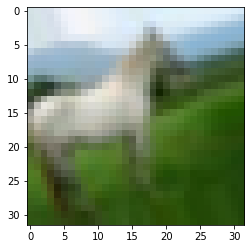

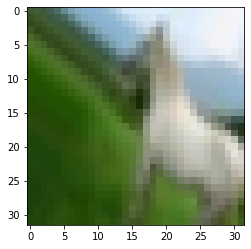

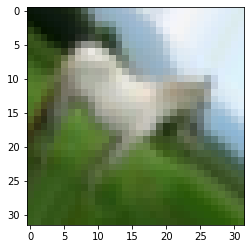

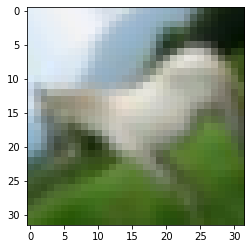

In [55]:
# Using Data Augmentaion
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

datagen = ImageDataGenerator(rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# We pick one image to "augment"
img = train_images[152]

# Resize the image
img = np.reshape(img, (32, 32, 3))

# Convert it to a Numpy array
x = image.img_to_array(img)

# Reshape it to (1, 32, 32, 3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    #conv_fm = model.predict(batch[0])
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    #save(X, y)
    i += 1
    if i % 4 == 0:#if i < 20000 == 0:
        break

plt.show()

In [56]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                 input_shape=(32, 32, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,789,258
Trainable params: 14,789,258
Non-trainable params: 0
_________________________________________________________________


In [57]:
conv_base.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,789,258
Trainable params: 74,570
Non-trainable params: 14,714,688
_________________________________________________________________


In [58]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels.shape, test_labels.shape

((50000, 10), (10000, 10))

In [59]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])


In [60]:
import tensorflow as tf

preprocess_input = tf.keras.applications.vgg16.preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,#rescale=1./255
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #rescale=1./255)


train_datagen.fit(train_images)
# fits the model on batches with real-time data augmentation:
history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=128),
         validation_data=test_datagen.flow(test_images, test_labels),
         steps_per_epoch=len(train_labels) / 128, epochs=10)

Epoch 1/10
391/390 [==============================] - ETA: 0s - batch: 195.0000 - size: 127.8772 - loss: 1.5353 - accuracy: 0.4576

C:\Users\ali\AppData\Roaming\Python\Python310\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


390/390 [==============================] - 72s 183ms/step - batch: 195.0000 - size: 127.8772 - loss: 1.5353 - accuracy: 0.4576 - val_loss: 1.2981 - val_accuracy: 0.5403
Epoch 2/10
390/390 [==============================] - 72s 184ms/step - batch: 195.0000 - size: 127.8772 - loss: 1.3524 - accuracy: 0.5240 - val_loss: 1.2111 - val_accuracy: 0.5735
Epoch 3/10
390/390 [==============================] - 72s 185ms/step - batch: 195.0000 - size: 127.8772 - loss: 1.3107 - accuracy: 0.5364 - val_loss: 1.2351 - val_accuracy: 0.5642
Epoch 4/10
390/390 [==============================] - 72s 185ms/step - batch: 195.0000 - size: 127.8772 - loss: 1.2861 - accuracy: 0.5448 - val_loss: 1.1637 - val_accuracy: 0.5870
Epoch 5/10
390/390 [==============================] - 69s 178ms/step - batch: 195.0000 - size: 127.8772 - loss: 1.2686 - accuracy: 0.5514 - val_loss: 1.1641 - val_accuracy: 0.5837
Epoch 6/10
390/390 [==============================] - 69s 178ms/step - batch: 195.0000 - size: 127.8772 - loss:

In [61]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

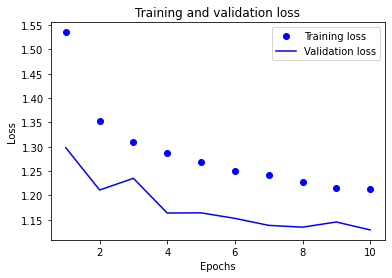

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

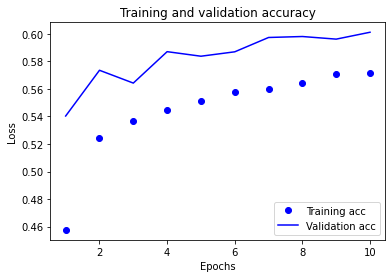

In [63]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Fine-tuning

In [64]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [65]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [66]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=128),
         validation_data=test_datagen.flow(test_images, test_labels),
         steps_per_epoch=len(train_labels) / 128, epochs=30)

Epoch 1/30
390/390 [==============================] - 599s 2s/step - batch: 195.0000 - size: 127.8772 - loss: 1.0948 - accuracy: 0.6102 - val_loss: 0.9351 - val_accuracy: 0.6720
Epoch 2/30
390/390 [==============================] - 646s 2s/step - batch: 195.0000 - size: 127.8772 - loss: 0.9783 - accuracy: 0.6532 - val_loss: 0.8823 - val_accuracy: 0.6933
Epoch 3/30
390/390 [==============================] - 645s 2s/step - batch: 195.0000 - size: 127.8772 - loss: 0.9221 - accuracy: 0.6747 - val_loss: 0.8481 - val_accuracy: 0.7085
Epoch 4/30
390/390 [==============================] - 648s 2s/step - batch: 195.0000 - size: 127.8772 - loss: 0.8843 - accuracy: 0.6866 - val_loss: 0.7849 - val_accuracy: 0.7332
Epoch 5/30
390/390 [==============================] - 618s 2s/step - batch: 195.0000 - size: 127.8772 - loss: 0.8454 - accuracy: 0.6999 - val_loss: 0.7893 - val_accuracy: 0.7288
Epoch 6/30
390/390 [==============================] - 604s 2s/step - batch: 195.0000 - size: 127.8772 - loss: 

In [68]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

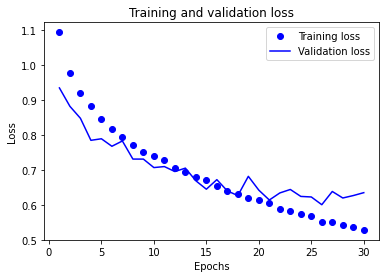

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

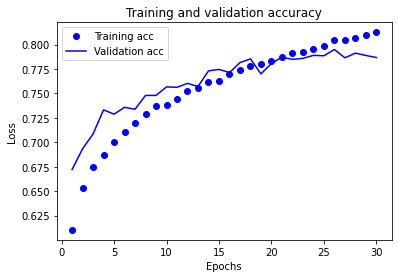

In [70]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [67]:
model.save('VGG16 AUG cifar.h5')

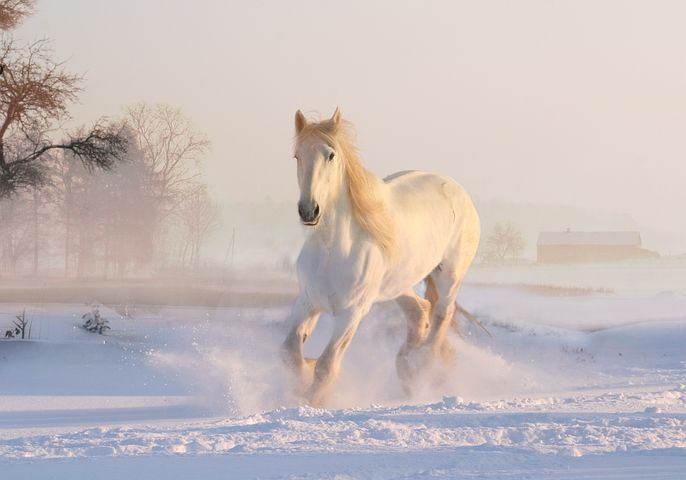

In [35]:
image = tf.keras.utils.load_img('horse ya 3aaaam.jpg')
image

In [38]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# The local path to our target image
img_path = 'horse ya 3aaaam.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(32, 32))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [39]:
x.shape

(1, 32, 32, 3)

In [40]:
from tensorflow.keras.models import load_model

model = load_model('convnet cifar.h5')
model.summary()  # As a reminder.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [41]:

graph = tf.compat.v1.get_default_graph()
with graph.as_default():
     preds = model.predict(x)


In [42]:
np.argmax(preds)

8

In [43]:
import tensorflow as tf
import tensorflow.keras.backend as K
K.clear_session()

tf.compat.v1.disable_eager_execution()

# This is the "african elephant" entry in the prediction vector
horse = model.output[:, 8]

In [44]:
last_conv_layer = model.get_layer('conv2d_23')

In [45]:
grads = K.gradients(horse, last_conv_layer.output)[0]


In [46]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))


In [47]:
last_conv_layer.output[0]

<tf.Tensor 'strided_slice_1:0' shape=(8, 8, 128) dtype=float32>

In [48]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])


ValueError: Tensor Tensor("Mean:0", shape=(128,), dtype=float32) is not an element of this graph.

In [17]:
import tensorflow as tf
import tensorflow.keras.backend as K
K.clear_session()

tf.compat.v1.disable_eager_execution()

# This is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 8]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('conv2d_23')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

ValueError: Tensor Tensor("Mean_1:0", shape=(128,), dtype=float32) is not an element of this graph.